In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df=pd.read_csv('telecom churn.csv')

In [3]:
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [4]:
df.shape

(7043, 21)

In [5]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df.isna().sum()/len(df)*100

,0
customerID,0.0
gender,0.0
SeniorCitizen,0.0
Partner,0.0
Dependents,0.0
tenure,0.0
PhoneService,0.0
MultipleLines,0.0
InternetService,0.0
OnlineSecurity,0.0


In [8]:

# Strip any leading/trailing spaces (if any)
df['TotalCharges'] = df['TotalCharges'].str.strip()

# Convert the column to numeric, setting errors='coerce' to turn non-numeric values into NaNs
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Check for any NaNs introduced by the conversion
nan_count = df['TotalCharges'].isna().sum()
print(f"Number of NaNs in 'TotalCharges' after conversion: {nan_count}")

# Optionally, you can fill NaNs with 0 or any other value, or drop them
# Fill NaNs with 0
df['TotalCharges'].fillna(0, inplace=True)

# Or you can drop the rows with NaNs
# df.dropna(subset=['TotalCharges'], inplace=True)

# Verify the conversion
print(df.dtypes)

Number of NaNs in 'TotalCharges' after conversion: 11
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object


<ipython-input-8-d1ccb890b657>:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(0, inplace=True)


In [9]:
# Fill NaNs with 0 using an alternative method to avoid the warning
df['TotalCharges'] = df['TotalCharges'].fillna(0)

# Verify the conversion and the absence of NaN values
print(df['TotalCharges'].isna().sum())
print(df.dtypes)

0
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object


In [10]:
df.duplicated().sum()

0

In [11]:
# Statistical summary of categoical variables

df.describe(include=['object'])

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,5174


In [12]:
df['gender'].value_counts()

,count
gender,
Male,3555
Female,3488


In [13]:
# Select only the numeric columns
numeric_df = df.select_dtypes(include=[float, int])
# Compute the correlation matrix
correlation_matrix = numeric_df.corr()
# Display the correlation matrix
print(correlation_matrix)

                SeniorCitizen    tenure  MonthlyCharges  TotalCharges
SeniorCitizen        1.000000  0.016567        0.220173      0.103006
tenure               0.016567  1.000000        0.247900      0.826178
MonthlyCharges       0.220173  0.247900        1.000000      0.651174
TotalCharges         0.103006  0.826178        0.651174      1.000000


In [14]:
# Identify non-numeric values in 'TotalCharges'
non_numeric_values = df[pd.to_numeric(df['TotalCharges'], errors='coerce').isna()]['TotalCharges']
print(f"Non-numeric values in 'TotalCharges':\n{non_numeric_values}")

# Optionally, you can remove rows with non-numeric 'TotalCharges' values
df = df[pd.to_numeric(df['TotalCharges'], errors='coerce').notna()]

# Convert 'TotalCharges' to numeric type
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])

Non-numeric values in 'TotalCharges':
Series([], Name: TotalCharges, dtype: float64)


In [15]:



# Remove rows with non-numeric 'TotalCharges' values
df = df[pd.to_numeric(df['TotalCharges'], errors='coerce').notna()]

# Convert 'TotalCharges' to numeric type
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])

# After cleaning, check for non-numeric values again (there should be none)
non_numeric_values = df[pd.to_numeric(df['TotalCharges'], errors='coerce').isna()]['TotalCharges']
print(f"Non-numeric values in 'TotalCharges':\n{non_numeric_values}")

# Select only the numeric columns for correlation analysis
numeric_df = df.select_dtypes(include=[float, int])

Non-numeric values in 'TotalCharges':
Series([], Name: TotalCharges, dtype: float64)


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [17]:
# Convert 'TotalCharges' to numeric type, coercing errors to NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Remove rows with NaN values in 'TotalCharges'
df = df.dropna(subset=['TotalCharges'])

In [18]:
# Select only the numeric columns
numeric_df = df.select_dtypes(include=[float, int])

In [19]:
# Compute the correlation matrix
corr_matrix = numeric_df.corr()

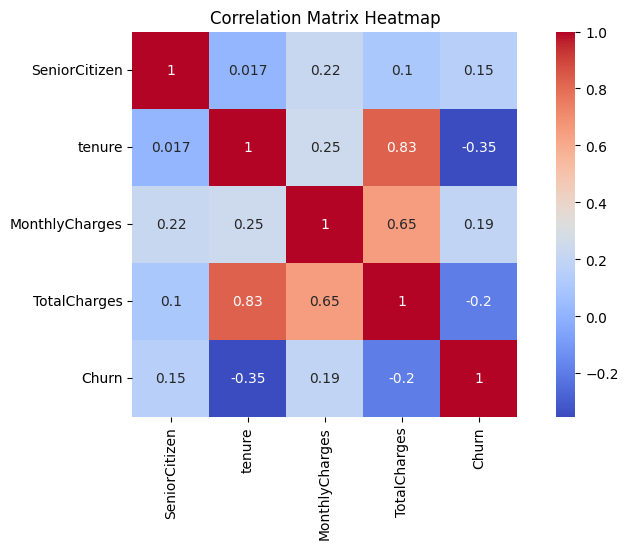

In [20]:

# Convert 'Churn' column to numerical values
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Convert 'TotalCharges' to numeric type, coercing errors to NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Remove rows with NaN values in 'TotalCharges'
df = df.dropna(subset=['TotalCharges'])

# Select only the numeric columns
numeric_df = df.select_dtypes(include=[float, int])

# Compute the correlation matrix
corr_matrix = numeric_df.corr()
# Plot the correlation matrix heatmap
plt.figure(figsize=(10, 5))  # Set the figure size
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [21]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [22]:
df.drop(columns=['customerID'],axis=1,inplace=True)

In [23]:

for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in '{column}': {unique_values}")
    print()


Unique values in 'gender': ['Female' 'Male']

Unique values in 'SeniorCitizen': [0 1]

Unique values in 'Partner': ['Yes' 'No']

Unique values in 'Dependents': ['No' 'Yes']

Unique values in 'tenure': [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]

Unique values in 'PhoneService': ['No' 'Yes']

Unique values in 'MultipleLines': ['No phone service' 'No' 'Yes']

Unique values in 'InternetService': ['DSL' 'Fiber optic' 'No']

Unique values in 'OnlineSecurity': ['No' 'Yes' 'No internet service']

Unique values in 'OnlineBackup': ['Yes' 'No' 'No internet service']

Unique values in 'DeviceProtection': ['No' 'Yes' 'No internet service']

Unique values in 'TechSupport': ['No' 'Yes' 'No internet service']

Unique values in 'StreamingTV': ['No' 'Yes' 'No internet service']

Unique values in 'StreamingMovies': ['No' 'Yes'

In [24]:
missing_values = df.isnull().sum()
data_types = df.dtypes

In [25]:
print('-'*50)
print("Missing values:")
print(missing_values)
print()

--------------------------------------------------
Missing values:
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64



In [26]:
x = df.duplicated().sum()
print('-'*50)
print("Duplicate values:", x)
print()


--------------------------------------------------
Duplicate values: 22



In [27]:
y = df.shape
print('-'*50)
print("Shape of Dataset:", y)
print()


--------------------------------------------------
Shape of Dataset: (7043, 20)



In [28]:
z = df.columns
print('-'*50)
print("Columns of Datset:", z)
print()

--------------------------------------------------
Columns of Datset: Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')



In [29]:
print('-'*50)
print("\nData types:")
print(data_types)
print()

--------------------------------------------------

Data types:
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object



In [30]:
# Make a copy of cleaned data
df_cleaned = df.copy()

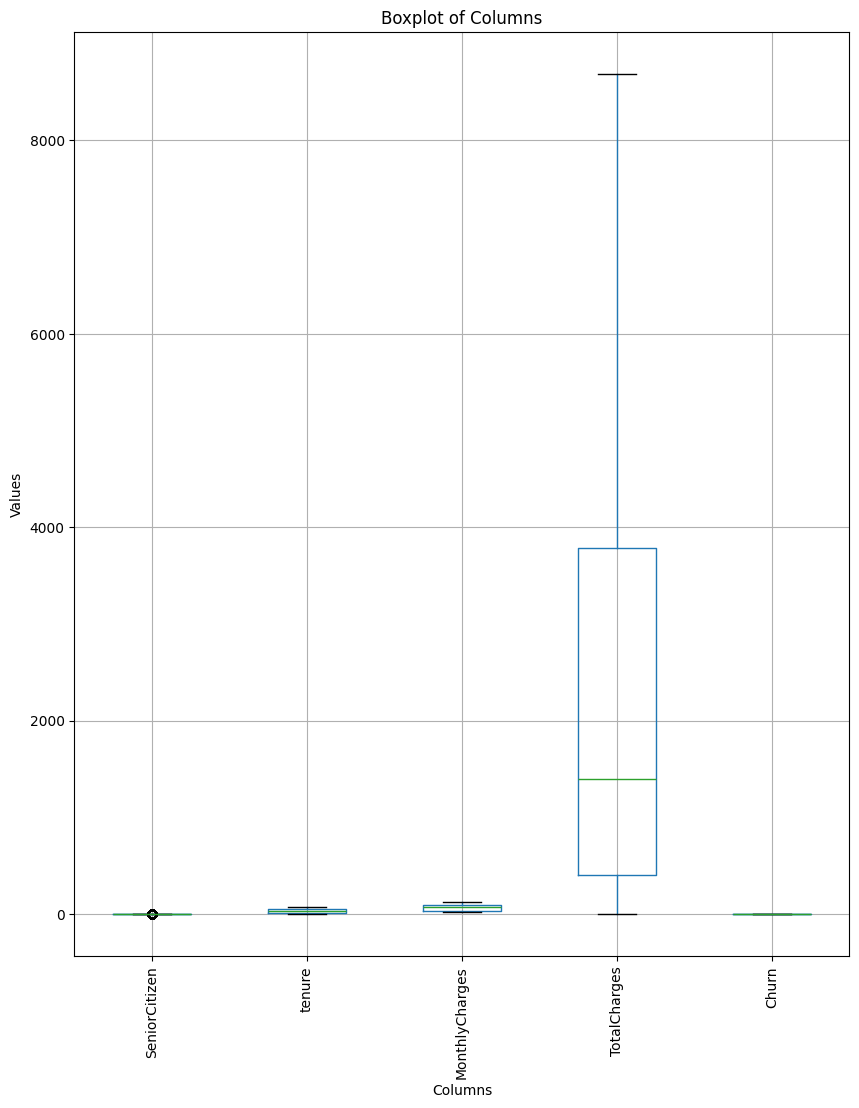

In [31]:

num_columns = len(df.columns)
if num_columns > 16:
    fig, ax = plt.subplots(figsize=(10, num_columns * 0.6))
else:
    fig, ax = plt.subplots(figsize=(num_columns, 6))

# Create a boxplot for each column
df.boxplot(ax=ax)

# Set the title and labels
plt.title("Boxplot of Columns")
plt.xlabel("Columns")
plt.ylabel("Values")

# Rotate the x-axis labels for better readability (optional)
plt.xticks(rotation=90)

# Show the plot
plt.show()

In [32]:
categorical_columns = df.select_dtypes(include=['object']).columns
categorical_columns

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

In [33]:

# Perform one-hot encoding
df_encoded = pd.get_dummies(df, columns=categorical_columns)

# Display the first few rows of the encoded DataFrame
print(df_encoded.head())

   SeniorCitizen  tenure  MonthlyCharges  TotalCharges  Churn  gender_Female  \
0              0       1           29.85         29.85      0           True   
1              0      34           56.95       1889.50      0          False   
2              0       2           53.85        108.15      1          False   
3              0      45           42.30       1840.75      0          False   
4              0       2           70.70        151.65      1           True   

   gender_Male  Partner_No  Partner_Yes  Dependents_No  Dependents_Yes  \
0        False       False         True           True           False   
1         True        True        False           True           False   
2         True        True        False           True           False   
3         True        True        False           True           False   
4        False        True        False           True           False   

   PhoneService_No  PhoneService_Yes  MultipleLines_No  \
0             Tr

In [34]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


<ipython-input-35-6bdbb0be1a89>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=encoded_counts, x='Variable', y='Count', palette='viridis')


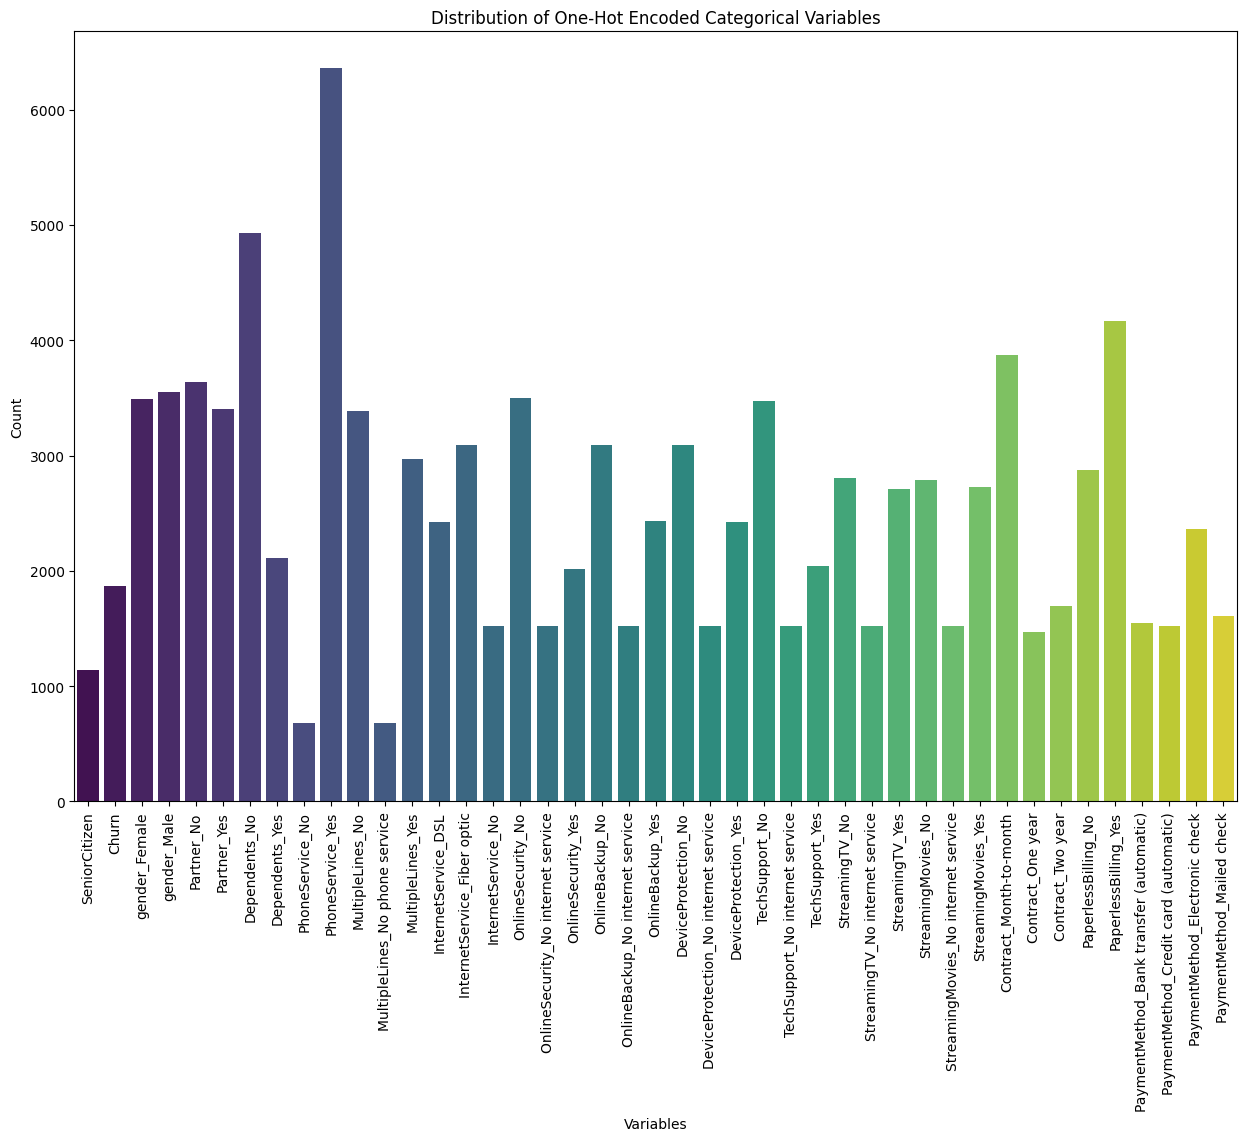

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter only the one-hot encoded binary columns (values 0 and 1)
binary_columns = df_encoded.columns[df_encoded.nunique() == 2]
df_binary = df_encoded[binary_columns]

# Sum the binary columns to get counts
encoded_counts = df_binary.sum(axis=0).reset_index()
encoded_counts.columns = ['Variable', 'Count']

# Set the size of the plot
plt.figure(figsize=(15, 10))

# Plot the distribution
sns.barplot(data=encoded_counts, x='Variable', y='Count', palette='viridis')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Set the title and labels
plt.title("Distribution of One-Hot Encoded Categorical Variables")
plt.xlabel("Variables")
plt.ylabel("Count")

# Show the plot
plt.show()


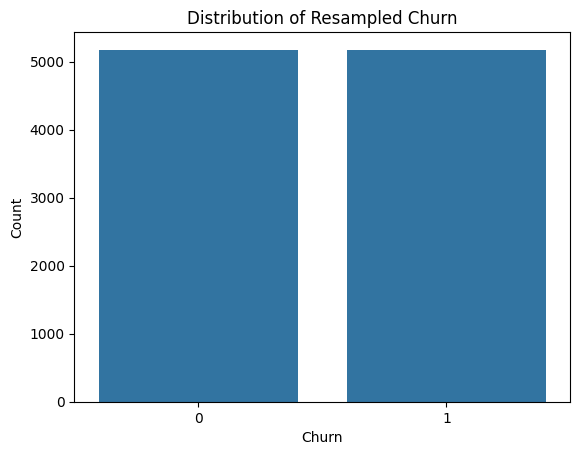

In [36]:
from imblearn.over_sampling import SMOTE

# Separate features and target variable
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check the distribution of the resampled target variable
sns.countplot(x=y_resampled)
plt.title('Distribution of Resampled Churn')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

In [37]:
x = df.drop("Churn",axis=1)
y = df['Churn']

In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [39]:
X_train.shape, y_train.shape

((4930, 19), (4930,))

In [40]:
X_test.shape, y_test.shape

((2113, 19), (2113,))

In [41]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [43]:
# Identify columns that need to be scaled
columns_to_check = df.columns
columns_needs_to_be_scaled = []

for column in columns_to_check:
    if pd.api.types.is_numeric_dtype(df[column]):
        if (df[column] > 1).any() or (df[column] < 0).any():
            columns_needs_to_be_scaled.append(column)

print("Columns with values greater than 1 or less than 0:")
print(columns_needs_to_be_scaled)

Columns with values greater than 1 or less than 0:
['tenure', 'MonthlyCharges', 'TotalCharges']


In [44]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming df is your DataFrame

# Separate features and target variable
X = df.drop("Churn", axis=1)
y = df["Churn"]

# Identify the columns that need to be scaled
columns_needs_to_be_scaled = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the standard scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform the training data
X_train[columns_needs_to_be_scaled] = scaler.fit_transform(X_train[columns_needs_to_be_scaled])

# Transform the test data
X_test[columns_needs_to_be_scaled] = scaler.transform(X_test[columns_needs_to_be_scaled])

# Checking the shapes to ensure they are the same
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

# Optionally, display the first few rows of the scaled training data
print(X_train.head())
print(X_test.head())

X_train shape: (4930, 19)
X_test shape: (2113, 19)
      gender  SeniorCitizen Partner Dependents    tenure PhoneService  \
1695    Male              0     Yes        Yes  0.881078          Yes   
1095    Male              0      No         No -1.284263          Yes   
3889    Male              0      No         No -0.793997          Yes   
3667  Female              1     Yes        Yes -0.344587          Yes   
2902  Female              1      No         No -1.079985          Yes   

     MultipleLines InternetService       OnlineSecurity         OnlineBackup  \
1695           Yes             DSL                   No                  Yes   
1095            No     Fiber optic                   No                   No   
3889            No              No  No internet service  No internet service   
3667            No     Fiber optic                   No                   No   
2902            No     Fiber optic                  Yes                   No   

         DeviceProtection    

In [45]:
X_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
1695,Male,0,Yes,Yes,0.881078,Yes,Yes,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Electronic check,0.195927,0.654503
1095,Male,0,No,No,-1.284263,Yes,No,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,0.522755,-0.974042
3889,Male,0,No,No,-0.793997,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Credit card (automatic),-1.509551,-0.894986
3667,Female,1,Yes,Yes,-0.344587,Yes,No,Fiber optic,No,No,Yes,No,Yes,Yes,Two year,Yes,Electronic check,1.053643,-0.010497
2902,Female,1,No,No,-1.079985,Yes,No,Fiber optic,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,0.308740,-0.810567


In [46]:
class_counts = df['Churn'].value_counts()
class_counts

,count
Churn,
0,5174
1,1869


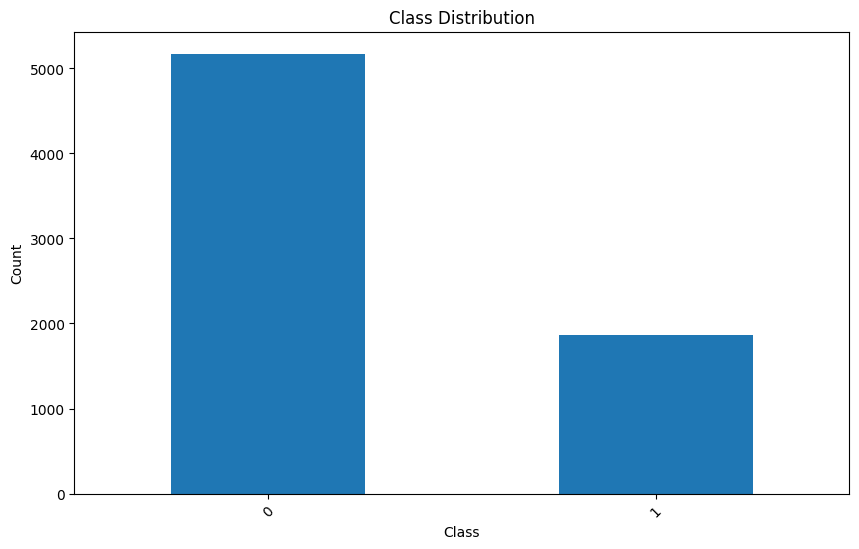

In [47]:
plt.figure(figsize=(10, 6))
class_counts.plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [49]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from imblearn.over_sampling import SMOTE
import pandas as pd

# Separate features and target variable
X = df.drop("Churn", axis=1)  # Drop the target column to get the features
y = df["Churn"]  # Target variable

# Split the dataset into training and testing sets with stratified sampling for class balance
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Define the preprocessing steps
# Assume we have numerical and categorical columns
numerical_features = X.select_dtypes(include=["float64", "int64"]).columns
categorical_features = X.select_dtypes(include=["object", "category"]).columns

# Define transformers for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numerical_features),  # Scale numerical features
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features),  # One-hot encode categorical features
    ]
)

# Fit and transform the training data
X_train_scaled = preprocessor.fit_transform(X_train)  # Preprocessing applied to training data

# Transform the test data using the same preprocessor
X_test_scaled = preprocessor.transform(X_test)

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)  # SMOTE for oversampling the minority class
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# Checking the shapes to ensure they are correct after resampling
print("X_train_resampled shape:", X_train_resampled.shape)
print("y_train_resampled shape:", y_train_resampled.shape)

# Optionally, display the class distribution after resampling
print("Class distribution after resampling:")
print(pd.Series(y_train_resampled).value_counts())


X_train_resampled shape: (7244, 45)
y_train_resampled shape: (7244,)
Class distribution after resampling:
Churn
0    3622
1    3622
Name: count, dtype: int64


In [51]:

from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

# Assuming df is your DataFrame

# Separate features and target variable
X = df.drop("Churn", axis=1)
y = df["Churn"]

# Identify categorical and numerical columns
categorical_columns = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
                       'PaperlessBilling', 'PaymentMethod']
numerical_columns = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

# Create a column transformer to preprocess the data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat', OneHotEncoder(), categorical_columns)
    ])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Fit and transform the training data
X_train_scaled = preprocessor.fit_transform(X_train)

# Transform the test data
X_test_scaled = preprocessor.transform(X_test)

# Fit the RandomForestClassifier on the preprocessed data
rf_classifier = RandomForestClassifier(n_jobs=-1, random_state=42)
rf_classifier.fit(X_train_scaled, y_train)

# Extract feature importances
importances = rf_classifier.feature_importances_

# Get feature names after preprocessing
feature_names = preprocessor.get_feature_names_out()

# Create a DataFrame for feature importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False).reset_index(drop=True)

# Display the feature importances
print(feature_importance_df)

                                         Feature  Importance
0                              num__TotalCharges    0.160187
1                                    num__tenure    0.135975
2                            num__MonthlyCharges    0.135288
3                   cat__Contract_Month-to-month    0.050492
4            cat__PaymentMethod_Electronic check    0.033596
5                         cat__OnlineSecurity_No    0.032354
6               cat__InternetService_Fiber optic    0.025790
7                            cat__TechSupport_No    0.025390
8                             num__SeniorCitizen    0.019231
9                           cat__OnlineBackup_No    0.018580
10                              cat__gender_Male    0.018036
11                            cat__gender_Female    0.017523
12                     cat__PaperlessBilling_Yes    0.016434
13                      cat__PaperlessBilling_No    0.015854
14                      cat__DeviceProtection_No    0.015513
15                      

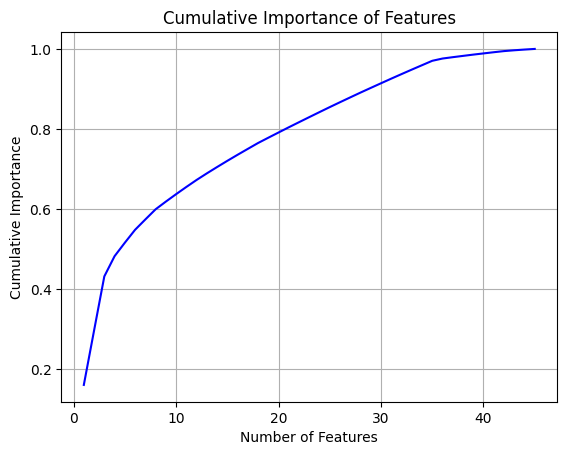

In [52]:

sorted_indices = np.argsort(importances)[::-1]
cumulative_importance = np.cumsum(importances[sorted_indices])

plt.plot(range(1, len(importances) + 1), cumulative_importance, 'b-')
plt.xlabel('Number of Features')
plt.ylabel('Cumulative Importance')
plt.title('Cumulative Importance of Features')
plt.grid(True)
plt.show()

In [55]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assuming df is your DataFrame

# Separate features and target variable
X = df.drop("Churn", axis=1)
y = df["Churn"]

# Identify categorical and numerical columns
categorical_columns = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
                       'PaperlessBilling', 'PaymentMethod']
numerical_columns = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

# Create a column transformer to preprocess the data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat', OneHotEncoder(), categorical_columns)
    ])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Fit and transform the training data
X_train_scaled = preprocessor.fit_transform(X_train)

# Convert the scaled training data back to DataFrame
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=preprocessor.get_feature_names_out())

# Calculate VIF for each feature
vif = pd.DataFrame()
vif["Variable"] = X_train_scaled_df.columns
vif["VIF"] = [variance_inflation_factor(X_train_scaled_df.values, i) for i in range(X_train_scaled_df.shape[1])]
vif = vif.sort_values(by='VIF', ascending=False)

# Display the VIF
print(vif)

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


                                        Variable         VIF
22         cat__OnlineBackup_No internet service         inf
23                         cat__OnlineBackup_Yes         inf
25     cat__DeviceProtection_No internet service         inf
26                     cat__DeviceProtection_Yes         inf
27                           cat__TechSupport_No         inf
28          cat__TechSupport_No internet service         inf
29                          cat__TechSupport_Yes         inf
30                           cat__StreamingTV_No         inf
31          cat__StreamingTV_No internet service         inf
32                          cat__StreamingTV_Yes         inf
33                       cat__StreamingMovies_No         inf
34      cat__StreamingMovies_No internet service         inf
35                      cat__StreamingMovies_Yes         inf
36                  cat__Contract_Month-to-month         inf
37                        cat__Contract_One year         inf
38                      

In [59]:
import time
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

# List of algorithms (currently includes only Random Forest; you can add more)
algorithms = [
    RandomForestClassifier(n_jobs=-1, random_state=42),
]

# Initialize the results dictionary for training data
results_train = {
    'Algorithm': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1-score': [],
    'Building Time (s)': []
}

# Apply the algorithms and calculate performance metrics for training data
for algorithm in algorithms:
    start_time = time.time()  # Start timer

    # Get the algorithm name
    algorithm_name = type(algorithm).__name__

    # Fit the model on the training data
    algorithm.fit(X_train_resampled, y_train_resampled)

    # Make predictions on the training data
    y_train_pred = algorithm.predict(X_train_resampled)

    # Calculate performance metrics
    accuracy = accuracy_score(y_train_resampled, y_train_pred)
    precision = precision_score(y_train_resampled, y_train_pred, average='weighted')
    recall = recall_score(y_train_resampled, y_train_pred, average='weighted')
    f1 = f1_score(y_train_resampled, y_train_pred, average='weighted')

    end_time = time.time()  # End timer
    building_time = end_time - start_time

    # Append the results to the dictionary
    results_train['Algorithm'].append(algorithm_name)
    results_train['Accuracy'].append(accuracy)
    results_train['Precision'].append(precision)
    results_train['Recall'].append(recall)
    results_train['F1-score'].append(f1)
    results_train['Building Time (s)'].append(building_time)

# Create a DataFrame for the training data results
df_train = pd.DataFrame(results_train)

# Display the results
print(df_train)


                Algorithm  Accuracy  Precision   Recall  F1-score  \
0  RandomForestClassifier   0.99862    0.99862  0.99862   0.99862   

   Building Time (s)  
0           2.516098  


In [60]:
import pandas as pd

# Assuming df is your DataFrame

# Function to remove outliers using IQR
def remove_outliers_iqr(df, columns):
    # For each specified column, calculate the IQR and remove outliers
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# Identify numerical columns (you can specify the columns you want to check for outliers)
numerical_columns = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

# Remove outliers from the DataFrame
df_cleaned = remove_outliers_iqr(df, numerical_columns)

# Display the cleaned DataFrame
print(df_cleaned.describe())

       SeniorCitizen       tenure  MonthlyCharges  TotalCharges        Churn
count         5882.0  5882.000000     5882.000000   5882.000000  5882.000000
mean             0.0    32.063924       61.671090   2156.562768     0.236654
std              0.0    24.564612       30.205385   2207.454210     0.425064
min              0.0     0.000000       18.250000      0.000000     0.000000
25%              0.0     8.250000       25.550000    357.712500     0.000000
50%              0.0    28.000000       65.650000   1282.050000     0.000000
75%              0.0    55.000000       86.450000   3532.700000     0.000000
max              0.0    72.000000      118.600000   8349.700000     1.000000


In [61]:
import pandas as pd

# Assuming df is your DataFrame

# Function to remove outliers using IQR
def remove_outliers_iqr(df, columns):
    # For each specified column, calculate the IQR and remove outliers
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# Identify numerical columns (you can specify the columns you want to check for outliers)
numerical_columns = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

# Remove outliers from the DataFrame
df_cleaned = remove_outliers_iqr(df, numerical_columns)

# Display the cleaned DataFrame
print(df_cleaned.describe())

       SeniorCitizen       tenure  MonthlyCharges  TotalCharges        Churn
count         5882.0  5882.000000     5882.000000   5882.000000  5882.000000
mean             0.0    32.063924       61.671090   2156.562768     0.236654
std              0.0    24.564612       30.205385   2207.454210     0.425064
min              0.0     0.000000       18.250000      0.000000     0.000000
25%              0.0     8.250000       25.550000    357.712500     0.000000
50%              0.0    28.000000       65.650000   1282.050000     0.000000
75%              0.0    55.000000       86.450000   3532.700000     0.000000
max              0.0    72.000000      118.600000   8349.700000     1.000000


In [62]:
df_cleaned = df_cleaned.drop(columns=["SeniorCitizen"])


In [63]:
from sklearn.model_selection import train_test_split
X = df_cleaned.drop("Churn", axis=1)
y = df_cleaned["Churn"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


In [66]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

# Define categorical and numerical columns
categorical_columns = ["gender", "Partner", "Dependents", "PhoneService", "MultipleLines",
                       "InternetService", "OnlineSecurity", "OnlineBackup", "DeviceProtection",
                       "TechSupport", "StreamingTV", "StreamingMovies", "Contract",
                       "PaperlessBilling", "PaymentMethod"]

numerical_columns = ["tenure", "MonthlyCharges", "TotalCharges"]

# Preprocess the data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_columns),  # Keep numerical columns as is
        ('cat', OneHotEncoder(), categorical_columns)  # One-hot encode categorical columns
    ]
)

# Separate features and target
X = df_cleaned.drop("Churn", axis=1)
y = df_cleaned["Churn"]

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Apply preprocessing
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Train the model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_processed, y_train)

# Predict on the test data
y_pred = rf.predict(X_test_processed)

# Evaluate performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1-score:", f1_score(y_test, y_pred, average='weighted'))


Accuracy: 0.8022662889518414
Precision: 0.7869265986196771
Recall: 0.8022662889518414
F1-score: 0.7897846692627787


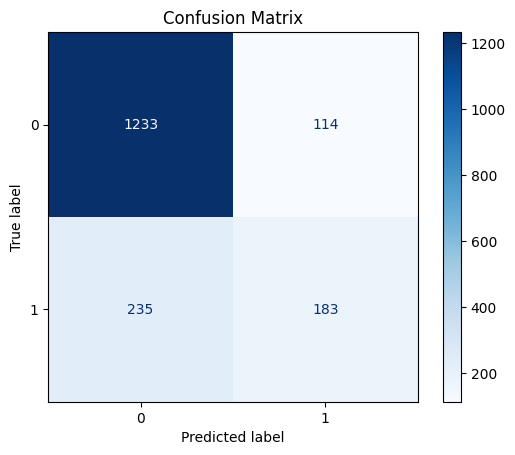

In [67]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


In [68]:
rf = RandomForestClassifier(random_state=42, class_weight='balanced')
rf.fit(X_train_processed, y_train)
y_pred = rf.predict(X_test_processed)


In [69]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

# Grid search
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='f1_weighted')
grid_search.fit(X_train_processed, y_train)

# Best parameters and model
best_rf = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

# Evaluate
y_pred = best_rf.predict(X_test_processed)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1-score:", f1_score(y_test, y_pred, average='weighted'))


Best Parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy: 0.8113314447592068
Precision: 0.7972111789456914
Recall: 0.8113314447592068
F1-score: 0.7989296234068233


In [71]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay


In [72]:
# Initialize KNN model
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn.fit(X_train_processed, y_train)


KNeighborsClassifier()

In [73]:
# Predict on the test data
y_pred_knn = knn.predict(X_test_processed)


Accuracy: 0.7835694050991502

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.90      0.86      1347
           1       0.56      0.41      0.47       418

    accuracy                           0.78      1765
   macro avg       0.69      0.66      0.67      1765
weighted avg       0.77      0.78      0.77      1765



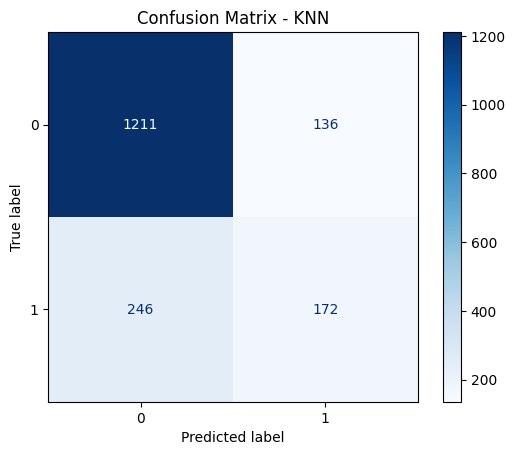

In [74]:
# Evaluate metrics
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("\nClassification Report:\n", classification_report(y_test, y_pred_knn))

# Confusion Matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)
disp_knn = ConfusionMatrixDisplay(confusion_matrix=cm_knn, display_labels=knn.classes_)
disp_knn.plot(cmap='Blues')
plt.title("Confusion Matrix - KNN")
plt.show()


In [77]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1-score:", f1_score(y_test, y_pred, average='weighted'))


Accuracy: 0.8113314447592068
Precision: 0.7972111789456914
Recall: 0.8113314447592068
F1-score: 0.7989296234068233


In [81]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [82]:
# Initialize SVM with default parameters
svm = SVC(kernel='rbf', random_state=42)  # 'rbf' is the default kernel

# Train the model
svm.fit(X_train_processed, y_train)



SVC(random_state=42)

In [83]:
# Predict on the test set
y_pred_svm = svm.predict(X_test_processed)


In [84]:
# Evaluate metrics
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm))

Accuracy: 0.7631728045325779

Classification Report:
               precision    recall  f1-score   support

           0       0.76      1.00      0.87      1347
           1       0.00      0.00      0.00       418

    accuracy                           0.76      1765
   macro avg       0.38      0.50      0.43      1765
weighted avg       0.58      0.76      0.66      1765



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


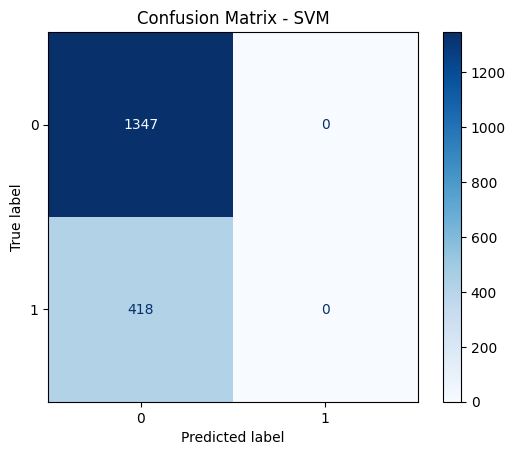

In [85]:
# Confusion Matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=svm.classes_)
disp_svm.plot(cmap='Blues')
plt.title("Confusion Matrix - SVM")
plt.show()